In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
jury = {"Ethnicity":["Asian","Black","Latino","White","Other"],"Eligible":[0.15,0.18,0.12,0.54,0.01],"Panels":[0.26,0.08,0.08,0.54,0.04]}
jury

{'Ethnicity': ['Asian', 'Black', 'Latino', 'White', 'Other'],
 'Eligible': [0.15, 0.18, 0.12, 0.54, 0.01],
 'Panels': [0.26, 0.08, 0.08, 0.54, 0.04]}

In [ ]:
Alameda_df = pd.DataFrame(jury)
Alameda_df

,Ethnicity,Eligible,Panels
0,Asian,0.15,0.26
1,Black,0.18,0.08
2,Latino,0.12,0.08
3,White,0.54,0.54
4,Other,0.01,0.04


In [ ]:
Alameda_df_1 = Alameda_df.set_index('Ethnicity')
Alameda_df_1

,Eligible,Panels
Ethnicity,,
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04



**visualization**

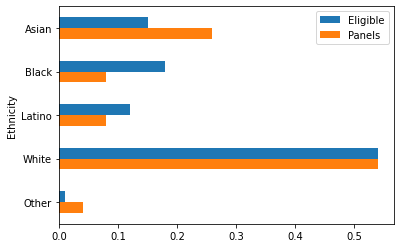

In [ ]:
Alameda_df_1 .plot.barh()
plt.ylabel('Ethnicity')
plt.gca().invert_yaxis()

In [ ]:
Alameda_df_1['jury_with_diffs'] = Alameda_df_1['Panels']-Alameda_df_1['Eligible']
Alameda_df_1

,Eligible,Panels,jury_with_diffs
Ethnicity,,,
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.10
Latino,0.12,0.08,-0.04
White,0.54,0.54,0.00
Other,0.01,0.04,0.03


In [ ]:
Alameda_df_1['Abs.Difference']=abs(Alameda_df_1['jury_with_diffs'])
Alameda_df_1

,Eligible,Panels,jury_with_diffs,Abs.Difference
Ethnicity,,,,
Asian,0.15,0.26,0.11,0.11
Black,0.18,0.08,-0.10,0.10
Latino,0.12,0.08,-0.04,0.04
White,0.54,0.54,0.00,0.00
Other,0.01,0.04,0.03,0.03


In [ ]:
test_statistic = Alameda_df_1['Abs.Difference'].sum()/2
test_statistic

0.14

In [ ]:
import numpy as np

In [ ]:
#function for calculating total variation distance
def total_variation_distance(distribution_1, distribution_2):
    return np.abs(distribution_1 - distribution_2).sum()/2


In [ ]:
def table_tvd(table, label, other):
    return total_variation_distance(table[label], table[other])

observed_stat =table_tvd(Alameda_df, 'Eligible', 'Panels')
print(observed_stat)

0.14


In [ ]:
panel_size = 1453

In [ ]:
import numpy.random as npr
np.random.multinomial(1453,[0.15,0.18,0.12,0.54,0.01])

array([0.14590502, 0.16586373, 0.11218169, 0.5615967 , 0.01445286])

In [ ]:
Alameda_df_2 = pd.DataFrame(Alameda_df_1,columns = ['Eligible','Panels'])
Alameda_df_2

,Eligible,Panels
Ethnicity,,
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


In [ ]:
Alameda_df_2['Random Sample'] = np.random.multinomial(1453,[0.15,0.18,0.12,0.54,0.01])/1453
Alameda_df_2

,Eligible,Panels,Random Sample
Ethnicity,,,
Asian,0.15,0.26,0.139711
Black,0.18,0.08,0.180317
Latino,0.12,0.08,0.116311
White,0.54,0.54,0.556779
Other,0.01,0.04,0.006882


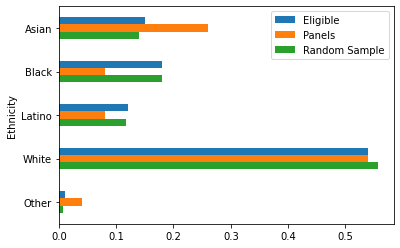

In [ ]:
Alameda_df_2.plot.barh()
plt.ylabel('Ethnicity')
plt.gca().invert_yaxis()

In [ ]:
TVD = (abs(Alameda_df_2['Eligible']-Alameda_df_2['Random Sample']))
TVD

Ethnicity
Asian     0.010289
Black     0.000317
Latino    0.003689
White     0.016779
Other     0.003118
dtype: float64

In [ ]:
TVD = (abs(Alameda_df_2['Eligible']-Alameda_df_2['Random Sample'])).sum()/2
TVD

0.0170956641431521

In [ ]:
simulations = 5000
tvd_list=[]
for i in np.arange(simulations):
    Alameda_df_2["Random Sample"]=(npr.multinomial(1453,[0.15, 0.18, 0.12, 0.54, 0.01]))/panel_size
    tvd_list.append(table_tvd(Alameda_df_2, 'Eligible', 'Random Sample'))
    
tvd_list

[0.02212663454920855,
 0.031727460426703366,
 0.01587749483826565,
 0.01779077770130763,
 0.0193392980041294,
 0.020027529249827945,
 0.02054370268410182,
 0.010392291810048204,
 0.018919476944253236,
 0.01937370956641436,
 0.018795595320027517,
 0.00778389538885061,
 0.022319339298004108,
 0.009242945629731582,
 0.021231933929800405,
 0.022498279421885776,
 0.008327598072952525,
 0.015127322780454254,
 0.025794907088781818,
 0.02366139022711632,
 0.005609084652443252,
 0.02035099793530628,
 0.013661390227116278,
 0.012126634549208572,
 0.02090846524432208,
 0.022071576049552625,
 0.008596008258774906,
 0.011775636613902286,
 0.015030970406056415,
 0.012374397797660029,
 0.020963523743977967,
 0.006441844459738437,
 0.02338609772883691,
 0.02713695801789399,
 0.012037164487267714,
 0.007942188575361301,
 0.018513420509291115,
 0.010213351686166532,
 0.018919476944253263,
 0.01369580178940123,
 0.008272539573296604,
 0.01097728836889191,
 0.016304198210598753,
 0.022663454920853417,
 0.

In [ ]:
tvd_final_df=pd.DataFrame(tvd_list)
tvd_final_df.rename(columns={0:"TVD"},inplace=True) # renaming column
tvd_final_df.head()

,TVD
0,0.022127
1,0.031727
2,0.015877
3,0.017791
4,0.019339


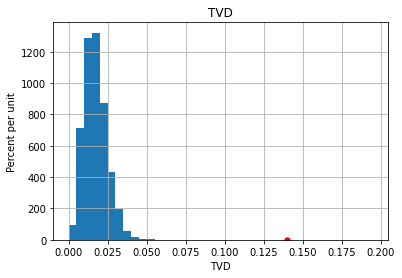

In [ ]:
tvd_final_df.hist(bins=np.arange(0,0.2,0.005))
plt.ylabel('Percent per unit')
plt.xlabel('TVD')
plt.scatter(observed_stat, 0, color='red', s=30)